✅ Dataset loaded successfully!


,FlightDate,AirlineCode,OriginAirport,DestAirport,DepDelayMinutes,ArrDelayMinutes,AircraftType,PassengerCount,FlightDistanceMiles,PassengerFeedback,Origin_Lat,Origin_Lon,Destination_Lat,Destination_Lon
0,2025-01-01,AA,JFK,LAX,10,5,B737,150,2475,Delayed baggage,40.6413,-73.7781,33.9416,-118.4085
1,2025-01-02,DL,LAX,JFK,0,-5,A320,120,2475,Good service,33.9416,-118.4085,40.6413,-73.7781
2,2025-01-03,UA,SFO,ORD,15,20,B777,200,1846,Late arrival,37.7749,-122.4194,41.9742,-87.9073
3,2025-02-01,AA,ORD,ATL,5,0,B737,180,606,Comfortable flight,41.9742,-87.9073,33.6407,-84.4277
4,2025-02-02,DL,ATL,SFO,20,25,A320,140,2139,Lost luggage,33.6407,-84.4277,37.6213,-122.3790



--- 4. Univariate Analysis ---


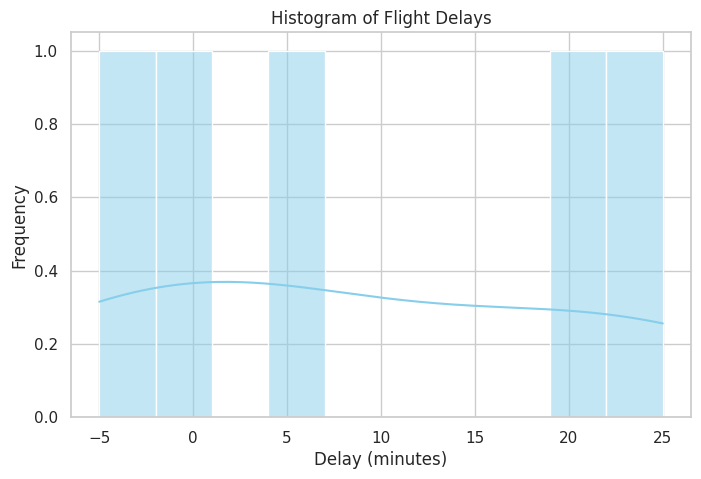

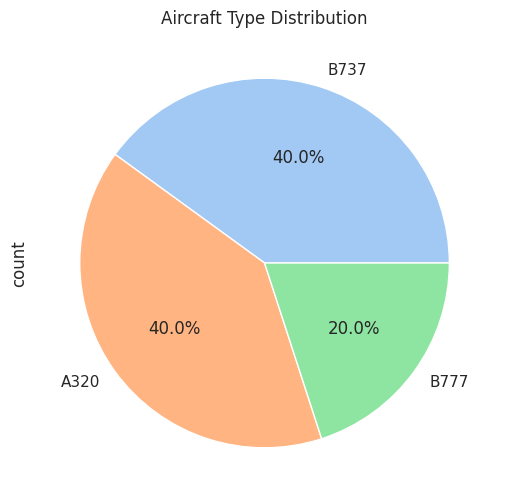


--- 5. Bivariate Analysis ---


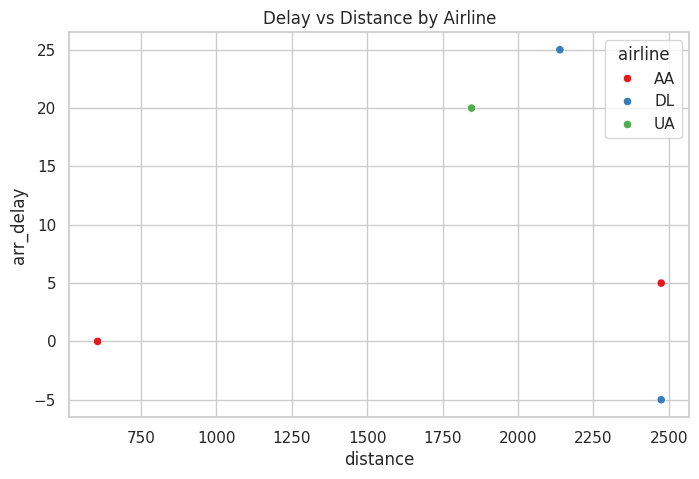

/tmp/ipython-input-1882099631.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airline', y='arr_delay', palette='Set2')


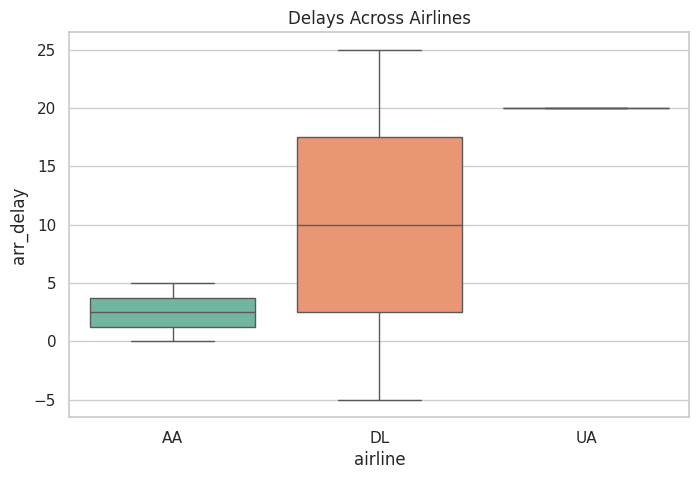


--- 6. Multivariate Analysis ---


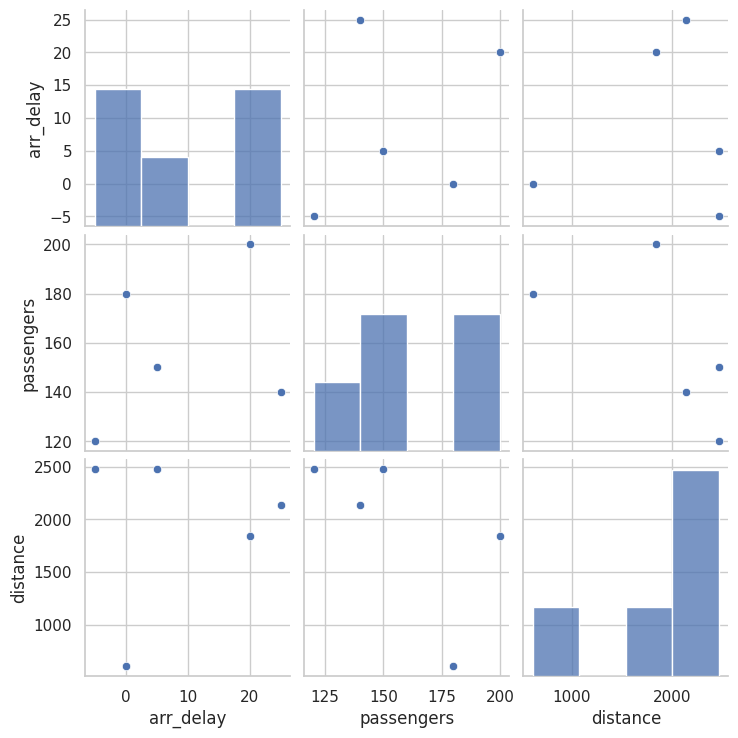

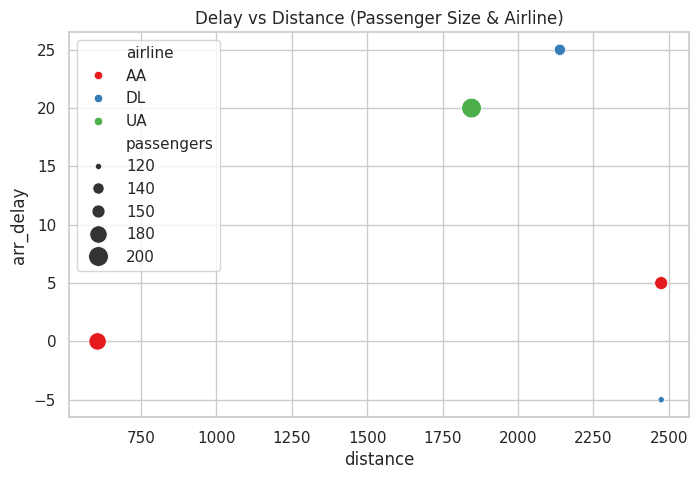


--- 7. Hierarchical Visualization (Treemap) ---



--- 8. Network Graph (Airport Connectivity) ---


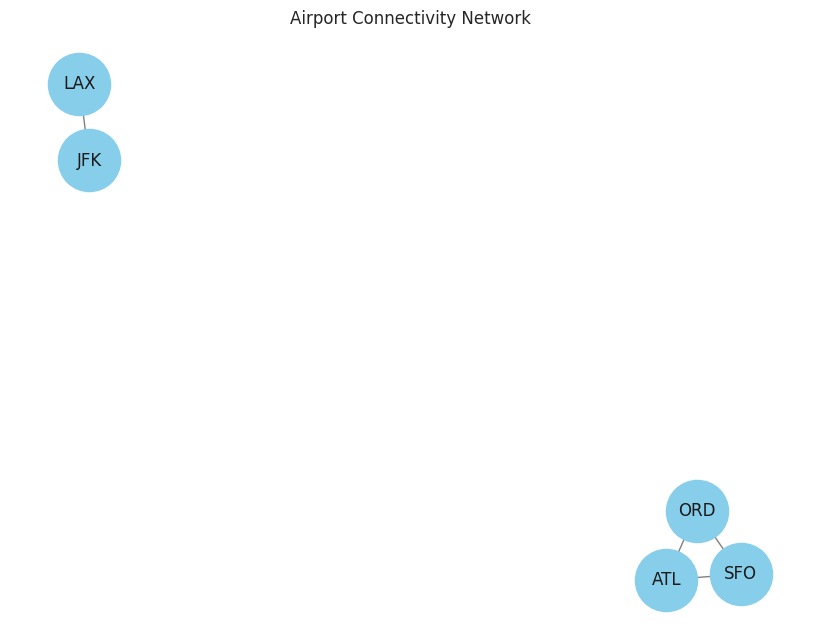


--- 9. Passenger Feedback Analysis ---
Feedback vectorized. Shape: (5, 10)


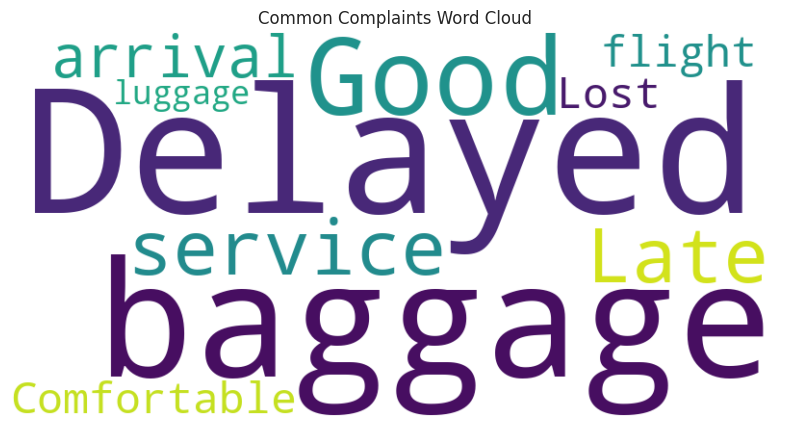


--- 10. Mapping Flights (Point Data) ---
Flight points map saved as 'flight_points_map.html'

--- 11. Flight Paths (Line Data) ---
Flight paths map saved as 'flight_paths_map.html'

--- 12. Heatmap (Airport Congestion) ---
Airport congestion heatmap saved as 'airport_congestion_heatmap.html'

--- 13. Time Series of Delays ---


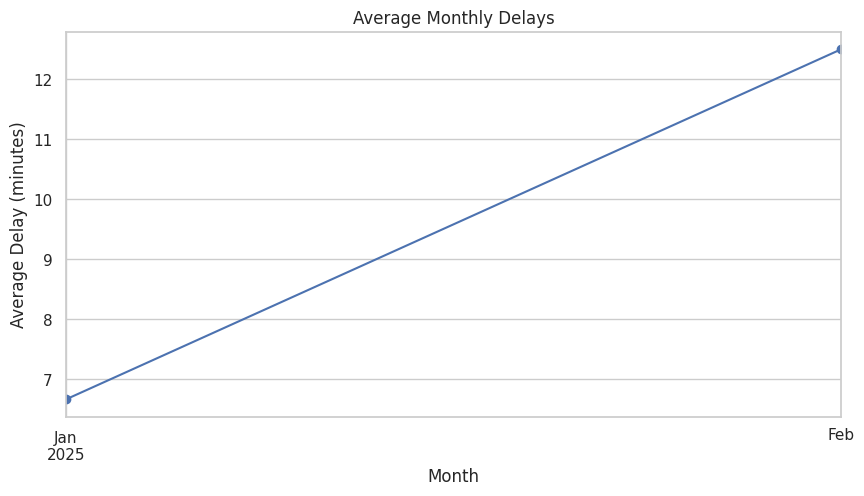


--- 14. Regression & Clustering ---


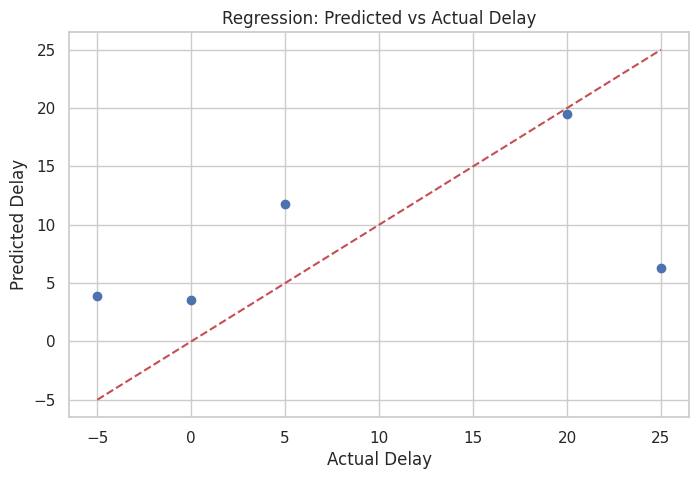

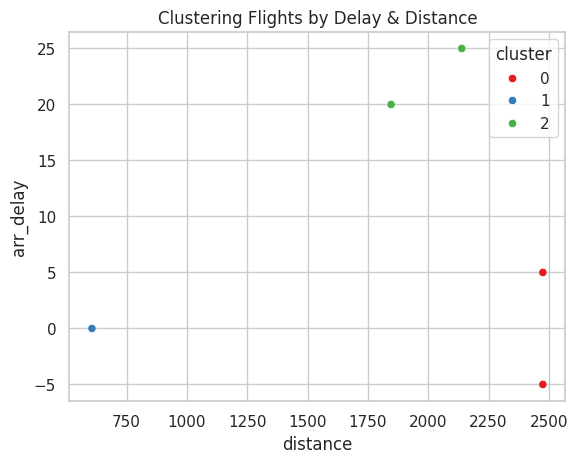


--- 15. Top Airlines by Delay ---

Top Airlines by Average Delay:
 airline
UA    20.0
DL    10.0
AA     2.5
Name: arr_delay, dtype: float64

--- 16. Longest Flights ---

Longest Flights:
   origin destination  distance
0    JFK         LAX      2475
1    LAX         JFK      2475
4    ATL         SFO      2139
2    SFO         ORD      1846
3    ORD         ATL       606

--- 17. Most Frequent Routes ---

Most Frequent Routes:
 route
JFK to LAX    1
LAX to JFK    1
SFO to ORD    1
ORD to ATL    1
ATL to SFO    1
Name: count, dtype: int64

--- 18. Delays Distribution by Airline (Boxplot) ---


/tmp/ipython-input-1882099631.py:235: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




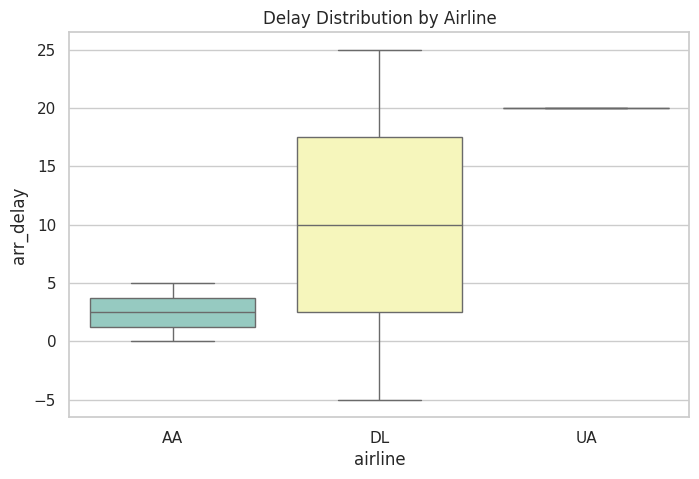

In [ ]:
# ===========================
# 1. Import Libraries
# ===========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import networkx as nx
import folium
from folium.plugins import HeatMap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import plotly.express as px

sns.set(style="whitegrid")

# ===========================
# 2. Load Dataset (or create sample)
# ===========================
# Option 1: Load your CSV
# df = pd.read_csv("your_dataset.csv")

# Option 2: Create a small sample dataset
data = {
    "FlightDate": ["2025-01-01","2025-01-02","2025-01-03","2025-02-01","2025-02-02"],
    "AirlineCode": ["AA","DL","UA","AA","DL"],
    "OriginAirport": ["JFK","LAX","SFO","ORD","ATL"],
    "DestAirport": ["LAX","JFK","ORD","ATL","SFO"],
    "DepDelayMinutes": [10,0,15,5,20],
    "ArrDelayMinutes": [5,-5,20,0,25],
    "AircraftType": ["B737","A320","B777","B737","A320"],
    "PassengerCount": [150,120,200,180,140],
    "FlightDistanceMiles": [2475,2475,1846,606,2139],
    "PassengerFeedback": ["Delayed baggage","Good service","Late arrival","Comfortable flight","Lost luggage"],
    "Origin_Lat": [40.6413,33.9416,37.7749,41.9742,33.6407],
    "Origin_Lon": [-73.7781,-118.4085,-122.4194,-87.9073,-84.4277],
    "Destination_Lat": [33.9416,40.6413,41.9742,33.6407,37.6213],
    "Destination_Lon": [-118.4085,-73.7781,-87.9073,-84.4277,-122.3790]
}
df = pd.DataFrame(data)
print("✅ Dataset loaded successfully!")
display(df.head())

# ===========================
# 3. Inspect Columns & Rename
# ===========================
df.rename(columns={
    'DepDelayMinutes':'dep_delay',
    'ArrDelayMinutes':'arr_delay',
    'AircraftType':'aircraft_type',
    'PassengerCount':'passengers',
    'FlightDistanceMiles':'distance',
    'FlightDate':'date',
    'AirlineCode':'airline',
    'OriginAirport':'origin',
    'DestAirport':'destination',
    'PassengerFeedback':'feedback',
    'Origin_Lat':'origin_lat',
    'Origin_Lon':'origin_lon',
    'Destination_Lat':'destination_lat',
    'Destination_Lon':'destination_lon'
}, inplace=True)

# ===========================
# 4. Univariate Analysis
# ===========================
print("\n--- 4. Univariate Analysis ---")
plt.figure(figsize=(8,5))
sns.histplot(df['arr_delay'], bins=10, kde=True, color='skyblue')
plt.title("Histogram of Flight Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,6))
df['aircraft_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Aircraft Type Distribution")
plt.show()

# ===========================
# 5. Bivariate Analysis
# ===========================
print("\n--- 5. Bivariate Analysis ---")
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='distance', y='arr_delay', hue='airline', palette='Set1')
plt.title("Delay vs Distance by Airline")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='airline', y='arr_delay', palette='Set2')
plt.title("Delays Across Airlines")
plt.show()

# ===========================
# 6. Multivariate Analysis
# ===========================
print("\n--- 6. Multivariate Analysis ---")
sns.pairplot(df[['arr_delay','passengers','distance']])
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='distance', y='arr_delay', hue='airline', size='passengers', sizes=(20,200), palette='Set1')
plt.title("Delay vs Distance (Passenger Size & Airline)")
plt.show()

# ===========================
# 7. Hierarchical Visualization (Treemap)
# ===========================
print("\n--- 7. Hierarchical Visualization (Treemap) ---")
df['route'] = df['origin'] + ' to ' + df['destination']
fig = px.treemap(df, path=['airline','route'], values='passengers', color='arr_delay', color_continuous_scale='RdYlGn_r')
fig.show()

# ===========================
# 8. Network Graph (Airport Connectivity)
# ===========================
print("\n--- 8. Network Graph (Airport Connectivity) ---")
G = nx.from_pandas_edgelist(df, 'origin', 'destination', edge_attr=True)
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray')
plt.title("Airport Connectivity Network")
plt.show()

# ===========================
# 9. Passenger Feedback Analysis
# ===========================
print("\n--- 9. Passenger Feedback Analysis ---")
vectorizer = CountVectorizer(stop_words='english')
X_feedback = vectorizer.fit_transform(df['feedback'].astype(str))
print("Feedback vectorized. Shape:", X_feedback.shape)

text = ' '.join(df['feedback'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Complaints Word Cloud")
plt.show()

# ===========================
# 10. Mapping Flights (Point Data)
# ===========================
print("\n--- 10. Mapping Flights (Point Data) ---")
m = folium.Map(location=[df['origin_lat'].mean(), df['origin_lon'].mean()], zoom_start=4)
for idx, row in df.iterrows():
    folium.CircleMarker([row['origin_lat'], row['origin_lon']], radius=5, color='blue', popup=row['origin']).add_to(m)
    folium.CircleMarker([row['destination_lat'], row['destination_lon']], radius=5, color='red', popup=row['destination']).add_to(m)
m.save("flight_points_map.html")
print("Flight points map saved as 'flight_points_map.html'")

# ===========================
# 11. Flight Paths (Line Data)
# ===========================
print("\n--- 11. Flight Paths (Line Data) ---")
m_lines = folium.Map(location=[df['origin_lat'].mean(), df['origin_lon'].mean()], zoom_start=4)
for idx, row in df.iterrows():
    folium.PolyLine([[row['origin_lat'], row['origin_lon']],
                     [row['destination_lat'], row['destination_lon']]],
                     color='green').add_to(m_lines)
m_lines.save("flight_paths_map.html")
print("Flight paths map saved as 'flight_paths_map.html'")

# ===========================
# 12. Heatmap (Airport Congestion)
# ===========================
print("\n--- 12. Heatmap (Airport Congestion) ---")
heat_df = df.groupby(['origin_lat','origin_lon']).size().reset_index(name='flights')
heat_data = [[row['origin_lat'], row['origin_lon'], row['flights']] for idx,row in heat_df.iterrows()]
m_heat = folium.Map(location=[df['origin_lat'].mean(), df['origin_lon'].mean()], zoom_start=4)
HeatMap(heat_data).add_to(m_heat)
m_heat.save("airport_congestion_heatmap.html")
print("Airport congestion heatmap saved as 'airport_congestion_heatmap.html'")

# ===========================
# 13. Time Series of Delays
# ===========================
print("\n--- 13. Time Series of Delays ---")
df['date'] = pd.to_datetime(df['date'])
monthly_delay = df.groupby(df['date'].dt.to_period('M'))['arr_delay'].mean()
monthly_delay.plot(figsize=(10,5), marker='o')
plt.title("Average Monthly Delays")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.show()

# ===========================
# 14. Regression & Clustering
# ===========================
print("\n--- 14. Regression & Clustering ---")
# Regression: Delay ~ Distance + Passengers
X = df[['distance','passengers']]
y = df['arr_delay']
reg = LinearRegression().fit(X, y)
df['predicted_delay'] = reg.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(df['arr_delay'], df['predicted_delay'])
plt.plot([df['arr_delay'].min(), df['arr_delay'].max()],
         [df['arr_delay'].min(), df['arr_delay'].max()], 'r--')
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Regression: Predicted vs Actual Delay")
plt.show()

# Clustering: Delay & Distance
kmeans = KMeans(n_clusters=3, random_state=42).fit(df[['arr_delay','distance']])
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='distance', y='arr_delay', hue='cluster', palette='Set1')
plt.title("Clustering Flights by Delay & Distance")
plt.show()

# ===========================
# 15-18: Extra Analyses Examples
# ===========================
print("\n--- 15. Top Airlines by Delay ---")
# 15. Top Airlines by Delay
top_airlines = df.groupby('airline')['arr_delay'].mean().sort_values(ascending=False)
print("\nTop Airlines by Average Delay:\n", top_airlines)

print("\n--- 16. Longest Flights ---")
# 16. Longest Flights
longest_flights = df.sort_values('distance', ascending=False)
print("\nLongest Flights:\n", longest_flights[['origin','destination','distance']])

print("\n--- 17. Most Frequent Routes ---")
# 17. Most Frequent Routes
frequent_routes = df['route'].value_counts()
print("\nMost Frequent Routes:\n", frequent_routes)

print("\n--- 18. Delays Distribution by Airline (Boxplot) ---")
# 18. Delays Distribution by Airline (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='airline', y='arr_delay', palette='Set3')
plt.title("Delay Distribution by Airline")
plt.show()